In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./covid-19-data-master/us.csv')
print(data)

           date    cases  deaths
0    2020-01-21        1       0
1    2020-01-22        1       0
2    2020-01-23        1       0
3    2020-01-24        2       0
4    2020-01-25        3       0
..          ...      ...     ...
180  2020-07-19  3785241  140373
181  2020-07-20  3845124  140904
182  2020-07-21  3910398  142031
183  2020-07-22  3980128  143167
184  2020-07-23  4050126  144283

[185 rows x 3 columns]


In [3]:
x = data.iloc[:, 1]
print(x)
s = [0]*185
s[0] = x[0]
for i in range(1, len(x)):
    s[i] = x[i] - x[i-1]
s = np.array(s)
s = s.reshape(-1, 1)
print(s)


0            1
1            1
2            1
3            2
4            3
        ...   
180    3785241
181    3845124
182    3910398
183    3980128
184    4050126
Name: cases, Length: 185, dtype: int64
[[    1]
 [    0]
 [    0]
 [    1]
 [    1]
 [    2]
 [    0]
 [    0]
 [    0]
 [    1]
 [    1]
 [    1]
 [    3]
 [    0]
 [    0]
 [    1]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    0]
 [    1]
 [    1]
 [    0]
 [    0]
 [    0]
 [   10]
 [    0]
 [    0]
 [    2]
 [    3]
 [    0]
 [    0]
 [   13]
 [    2]
 [   15]
 [    0]
 [    5]
 [    5]
 [   18]
 [   16]
 [   21]
 [   36]
 [   67]
 [   83]
 [  117]
 [  119]
 [  201]
 [  270]
 [  245]
 [  405]
 [  556]
 [  674]
 [  702]
 [  907]
 [ 1399]
 [ 2444]
 [ 4043]
 [ 5619]
 [ 6516]
 [ 8545]
 [10432]
 [10433]
 [14634]
 [16998]
 [17330]
 [21066]
 [18520]
 [21469]
 [24506]
 [26930]
 [29717]
 [32318]
 [35099]
 [25616]
 [30916]
 [30337]
 [31820]
 [34699]
 [33473]
 [31720]
 [27143]
 [25769]
 [26691]
 [30033]
 [31613]
 [31509]
 [28

In [4]:
y = [0]*185
for i in range(len(y)):
    y[i] = i
y = np.array(y)
y = y.reshape(-1,1)


Text(0, 0.5, 'days since first case')

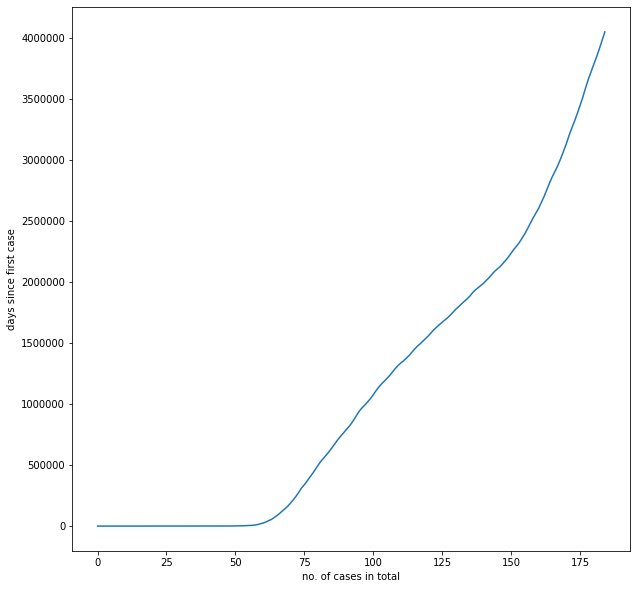

In [5]:
plt.figure(figsize = (10,10))
plt.plot(y, x)
plt.xlabel('no. of cases in total')
plt.ylabel('days since first case')


In [98]:


from sklearn.preprocessing import StandardScaler
scaled_x = StandardScaler()
scaled_y = StandardScaler()
s = scaled_x.fit_transform(s)
y = scaled_y.fit_transform(y)
print(np.concatenate((s.reshape(len(x), 1), y.reshape(len(y), 1)), 1))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(y, s, test_size = 0.2, random_state = 0)

[[-1.11706611e+00 -1.72271354e+00]
 [-1.11711714e+00 -1.70398839e+00]
 [-1.11711714e+00 -1.68526324e+00]
 [-1.11706611e+00 -1.66653810e+00]
 [-1.11706611e+00 -1.64781295e+00]
 [-1.11701508e+00 -1.62908780e+00]
 [-1.11711714e+00 -1.61036266e+00]
 [-1.11711714e+00 -1.59163751e+00]
 [-1.11711714e+00 -1.57291236e+00]
 [-1.11706611e+00 -1.55418721e+00]
 [-1.11706611e+00 -1.53546207e+00]
 [-1.11706611e+00 -1.51673692e+00]
 [-1.11696406e+00 -1.49801177e+00]
 [-1.11711714e+00 -1.47928663e+00]
 [-1.11711714e+00 -1.46056148e+00]
 [-1.11706611e+00 -1.44183633e+00]
 [-1.11711714e+00 -1.42311118e+00]
 [-1.11711714e+00 -1.40438604e+00]
 [-1.11711714e+00 -1.38566089e+00]
 [-1.11711714e+00 -1.36693574e+00]
 [-1.11706611e+00 -1.34821060e+00]
 [-1.11711714e+00 -1.32948545e+00]
 [-1.11706611e+00 -1.31076030e+00]
 [-1.11706611e+00 -1.29203515e+00]
 [-1.11711714e+00 -1.27331001e+00]
 [-1.11711714e+00 -1.25458486e+00]
 [-1.11711714e+00 -1.23585971e+00]
 [-1.11660687e+00 -1.21713457e+00]
 [-1.11711714e+00 -1

In [99]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

E:\SOFTWARES\Anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [100]:

y_pred = regressor.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1) ,  y_test.reshape(len(y_test),1)),1))

[[-1.20866787 -1.11711714]
 [-0.06294918 -0.14249724]
 [ 1.87682197  1.83261337]
 [ 0.134063    0.02073884]
 [-0.46380085 -0.68108954]
 [-1.17994241 -1.11711714]
 [ 0.0250541   0.03181175]
 [-1.07152399 -1.11711714]
 [-1.04979203 -1.11701508]
 [ 1.21794991  1.43307024]
 [ 0.61924973  0.2289299 ]
 [ 1.58942142  1.64636402]
 [-0.0559582  -0.09499089]
 [-0.05424746  0.2570459 ]
 [ 0.78933115  0.7703287 ]
 [ 1.34320576  1.76709442]
 [-0.38024805 -0.58475015]
 [-1.17131565 -1.11711714]
 [ 0.04829127 -0.16719441]
 [-0.74125458 -1.08129603]
 [-1.0466593  -1.11369831]
 [ 0.17522791 -0.08039711]
 [ 1.46743842  1.16716739]
 [-0.5052047  -0.78462377]
 [-0.06144605 -0.06422148]
 [ 1.76557783  2.364317  ]
 [-0.02943995 -0.09764431]
 [-1.03889691 -1.11706611]
 [ 0.21599712  0.29337728]
 [-0.25489284 -0.23281541]
 [ 0.90846405  1.20594808]
 [ 0.23995175  0.17560645]
 [ 0.3567639   0.49600637]
 [ 0.05528017  0.09013586]
 [-1.22269456 -1.11711714]
 [-0.70391332 -1.07083545]
 [-0.01380484 -0.0142148 ]]


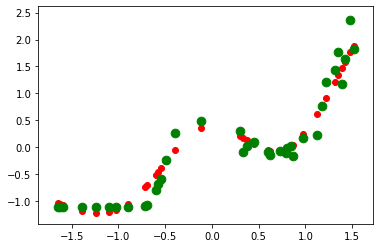

In [104]:
plt.scatter(x_test, y_pred, c = 'red')
plt.scatter(x_test, y_test, c = 'green', s= 75)

[[-1.20866787 -1.11711714]
 [-0.06294918 -0.14249724]
 [ 1.87682197  1.83261337]
 [ 0.134063    0.02073884]
 [-0.46380085 -0.68108954]
 [-1.17994241 -1.11711714]
 [ 0.0250541   0.03181175]
 [-1.07152399 -1.11711714]
 [-1.04979203 -1.11701508]
 [ 1.21794991  1.43307024]
 [ 0.61924973  0.2289299 ]
 [ 1.58942142  1.64636402]
 [-0.0559582  -0.09499089]
 [-0.05424746  0.2570459 ]
 [ 0.78933115  0.7703287 ]
 [ 1.34320576  1.76709442]
 [-0.38024805 -0.58475015]
 [-1.17131565 -1.11711714]
 [ 0.04829127 -0.16719441]
 [-0.74125458 -1.08129603]
 [-1.0466593  -1.11369831]
 [ 0.17522791 -0.08039711]
 [ 1.46743842  1.16716739]
 [-0.5052047  -0.78462377]
 [-0.06144605 -0.06422148]
 [ 1.76557783  2.364317  ]
 [-0.02943995 -0.09764431]
 [-1.03889691 -1.11706611]
 [ 0.21599712  0.29337728]
 [-0.25489284 -0.23281541]
 [ 0.90846405  1.20594808]
 [ 0.23995175  0.17560645]
 [ 0.3567639   0.49600637]
 [ 0.05528017  0.09013586]
 [-1.22269456 -1.11711714]
 [-0.70391332 -1.07083545]
 [-0.01380484 -0.0142148 ]]


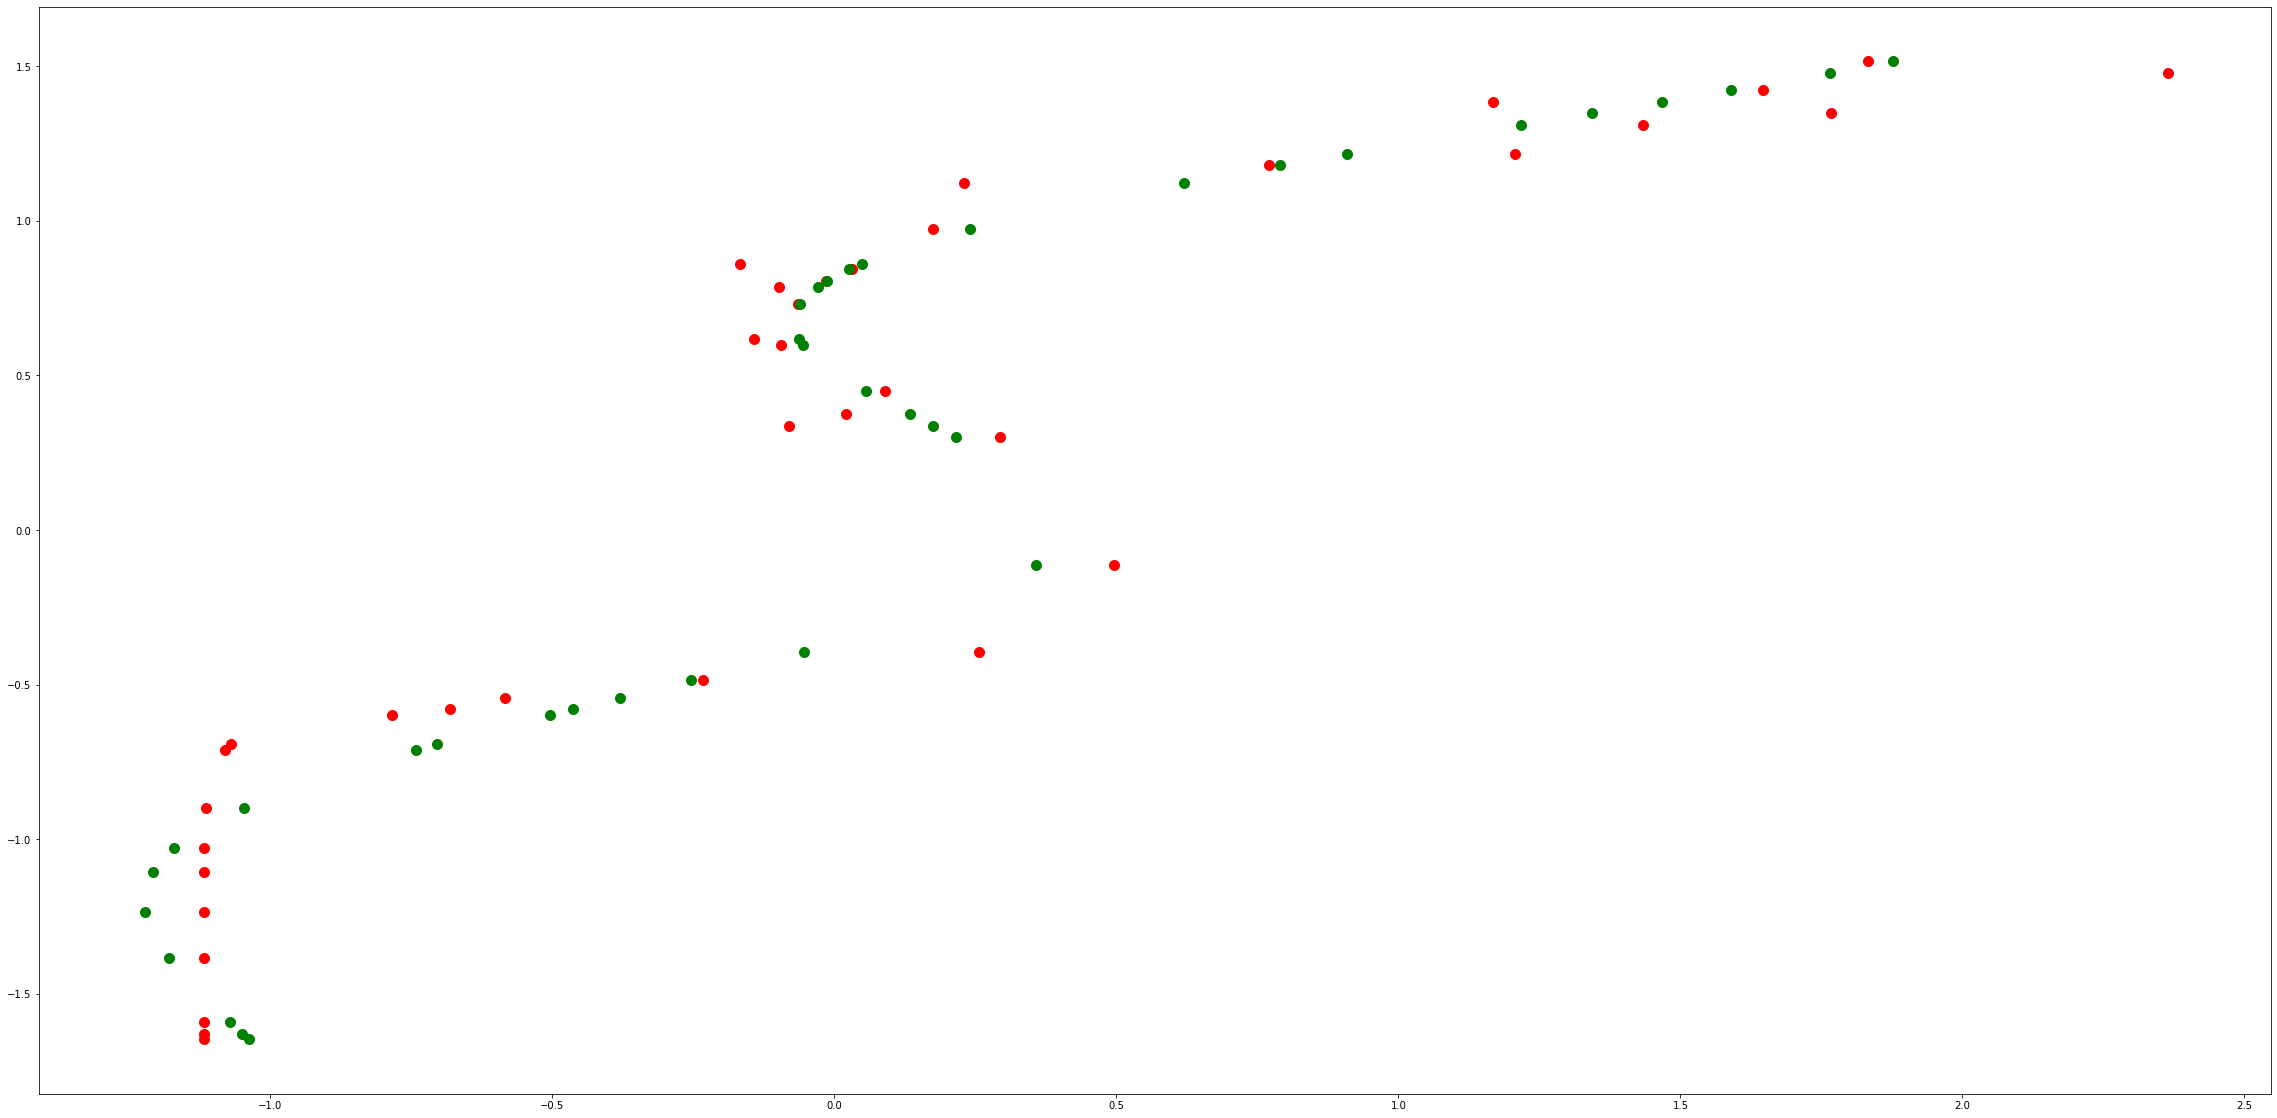

In [108]:
x_t = scaled_x.inverse_transform(x_test)
y_p = scaled_y.inverse_transform(y_pred)
y_t = scaled_y.inverse_transform(y_test)

print(np.concatenate((y_p.reshape(len(y_p), 1), y_t.reshape(len(y_t), 1)), 1))

plt.figure(figsize = (40,20))
plt.scatter(y_t, x_t, c = "red", s = 100 )
plt.scatter(y_p, x_t, c = 'green', s = 100)